**Importing libraries.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

**Creating split dataset.**

In [2]:
def generate_spiral(points_per_class=200, noise=0.4, classes=3):
    N = points_per_class
    D = 2
    K = classes
    X = np.zeros((N*K, D))
    y = np.zeros(N*K, dtype='uint8')
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0, 1, N)                    # radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise  # angle + noise
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    return X, y

**Create data.**

In [3]:
X, y = generate_spiral()

**Ploting the data set for visulazition.**

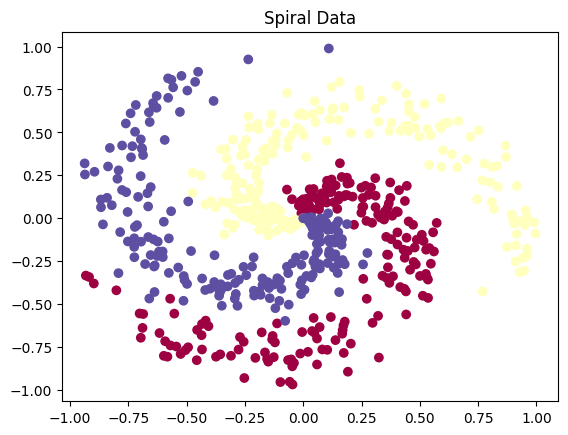

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='Spectral')
plt.title("Spiral Data")
plt.show()

**train test split .**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Converting the  labels to one-hot encoding vectors for class type.**

In [6]:
y_train_cat = to_categorical(y_train, 3)
y_test_cat = to_categorical(y_test, 3)

**For Model building in 1st hidden layer is going to be 32 neurons and same goes for 2nd layer. **

In [8]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**ReLU is simple and works well. Adam optimizer is adaptive and doesn't need tuning.**

**Comping the model now.**

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Training the model .**

**20 Percent of training set is used for validation to check performance during training.**

In [10]:
history = model.fit(X_train, y_train_cat, epochs=300, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/300
12/12 - 1s - 102ms/step - accuracy: 0.3438 - loss: 1.0850 - val_accuracy: 0.3438 - val_loss: 1.0630
Epoch 2/300
12/12 - 0s - 6ms/step - accuracy: 0.4635 - loss: 1.0486 - val_accuracy: 0.4583 - val_loss: 1.0338
Epoch 3/300
12/12 - 0s - 12ms/step - accuracy: 0.5521 - loss: 1.0171 - val_accuracy: 0.4896 - val_loss: 1.0043
Epoch 4/300
12/12 - 0s - 11ms/step - accuracy: 0.5495 - loss: 0.9834 - val_accuracy: 0.4688 - val_loss: 0.9754
Epoch 5/300
12/12 - 0s - 16ms/step - accuracy: 0.5521 - loss: 0.9499 - val_accuracy: 0.4792 - val_loss: 0.9470
Epoch 6/300
12/12 - 0s - 21ms/step - accuracy: 0.5469 - loss: 0.9176 - val_accuracy: 0.4688 - val_loss: 0.9230
Epoch 7/300
12/12 - 0s - 7ms/step - accuracy: 0.5365 - loss: 0.8858 - val_accuracy: 0.5000 - val_loss: 0.8973
Epoch 8/300
12/12 - 0s - 7ms/step - accuracy: 0.5339 - loss: 0.8554 - val_accuracy: 0.4896 - val_loss: 0.8755
Epoch 9/300
12/12 - 0s - 19ms/step - accuracy: 0.5339 - loss: 0.8286 - val_accuracy: 0.4896 - val_loss: 0.8558
Epo

**Ploting training and validation accuracy and loss.**

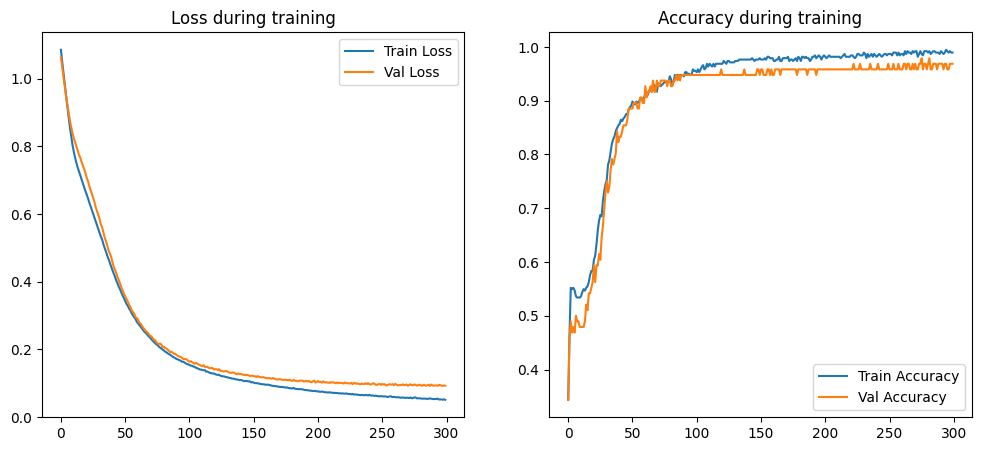

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss during training')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy during training')

plt.show()

**I think this is a good fit model as trainning and valadition accuracy are close enough.**

**ploting decision boundaries**

In [12]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    Z = np.argmax(preds, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.6, cmap='Spectral')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='Spectral', edgecolors='k')
    plt.title('Decision Boundary')
    plt.show()

**Ploting  decision boundary.**

2720/2720 ━━━━━━━━━━━━━━━━━━━━ 2s 785us/step


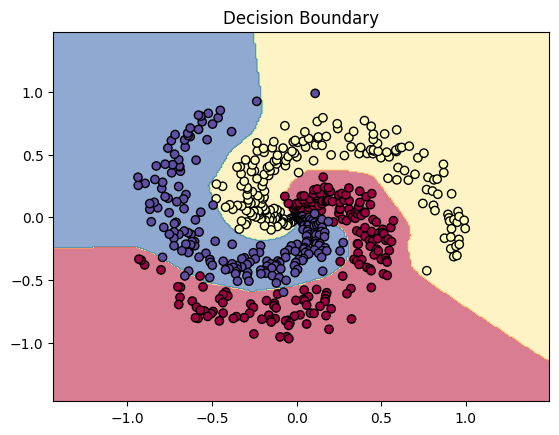

In [13]:
plot_decision_boundary(model, X, y)

1:  The decision boundary shows how the model classifies regions of space.

2:  Clear separation between spiral arms means the model learned the patterns well.